In [1]:
#Author:
#Name;Surname;Number;
#Bartosz;Durys;229869;

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chi2_normality as chi2

In [285]:
#Wariancja
def getVar(df):
    return df.var(ddof=0)

In [286]:
#Kowariancja, bo domyslnie ddof=1 w cov() i nie moge tego zmienic
def getCov(df1, df2):
    mean1 = df1.mean()
    mean2 = df2.mean()
    res = 0
    for a,b in zip(df1, df2):
        res += (a-mean1)*(b-mean2)
    res /= len(df1)
    return res

In [287]:
#Oblicz a dla f(x)=ax; wzóra na a obliczony ręcznie ((Z-Y)**2).mean() -> min; a=(XY).mean()/((X**2).mean())
def yax(dfX, dfY):
    return (dfX*dfY).mean()/(dfX**2).mean()
#(dfX**2).mean() != 0

In [288]:
#Oblicz a dla f(x)=ax+b; wzóra z pdfa; a=COV(X,Y)/VAR(X), b=Y.mean()-a*(X.mean())
def yaxb(dfX, dfY):
    a = getCov(dfX,dfY)/getVar(dfX)
    return [a, (dfY.mean()-a*dfX.mean())]
#VAR(X) != 0

In [289]:
#Rozwiazanie wielokolumnowej regresji liniowej
def linRegSolve(dfXs, dfY):
    X = np.vstack((dfXs, np.ones(len(dfY)))).T
    res = np.linalg.lstsq(X, dfY, rcond=None)
    return res[0]

In [290]:
def graph2DScatter(dfX, dfY):
    plt.scatter(dfX, dfY)

In [291]:
def graph2DMix(dfX, dfY, predY):
    plt.scatter(dfX, dfY)
    plt.plot(dfX, predY)

In [292]:
def graph3DScatter(dfX1, dfX2, dfY):
    plt.axes(projection='3d').plot3D(dfX1, dfX2, dfY, 'o')

In [293]:
def graph3DMix(dfX1, dfX2, dfY, predY):
    ax=plt.axes(projection='3d')
    ax.plot3D(dfX1, dfX2, dfY, 'o')
    ax.plot_surface(dfX1, dfX2, predY)

In [294]:
def histErr(dfY, predY):
    hist(err(dfY, predY))

In [295]:
def hist(dfX):
    plt.hist(dfX)

In [296]:
def mean2Err(dfY, predY):
    return (err(predY, dfY)**2).mean()

In [297]:
def maxDev(dfY, predY):
    return (err(predY, dfY)).max()

In [298]:
def err(dfY, predY):
    return dfY-predY

In [299]:
# R2 = 1 - VAR(ERR)/VAR(Y)
def R2(dfY, predY):
    return (1-getVar(err(dfY, predY))/getVar(dfY))

In [300]:
columnNames =["X", "Y"]
data1 = pd.read_csv("data1.csv", names = columnNames)
data2 = pd.read_csv("data2.csv", names = columnNames)
columnNames2 =["X1", "X2", "Y"]
data3 = pd.read_csv("data3.csv", names = columnNames2)
data4 = pd.read_csv("data4.csv", names = columnNames2)

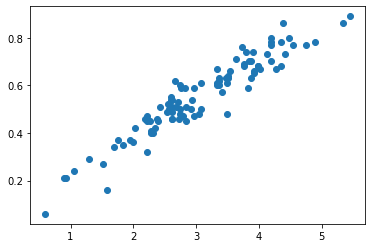

In [301]:
graph2DScatter(data1['X'], data1['Y'])

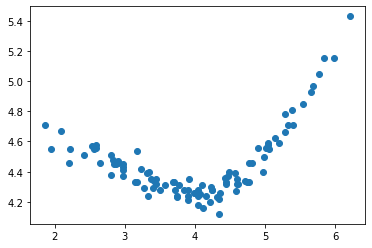

In [302]:
graph2DScatter(data2['X'], data2['Y'])

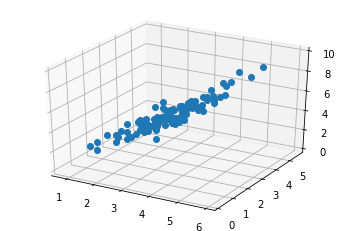

In [303]:
graph3DScatter(data3['X1'], data3['X2'], data3['Y'])

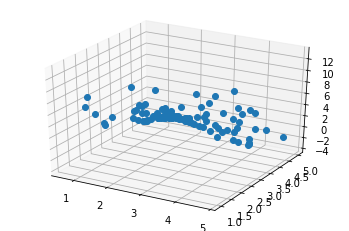

In [304]:
graph3DScatter(data4['X1'], data4['X2'], data4['Y'])

In [305]:
def getDetails(dfY, predY):
    #średni błąd kwadratowy dotyczący wartości funkcji w danych punktach
    res1 = mean2Err(dfY, predY)
    #największą wartość odchylenia wartości funkcji od danych punktów
    res2 = maxDev(dfY, predY)
    #wartość współczynnika R**2
    res3 = R2(dfY, predY)
    chi2.chi2normality_describe(err(dfY, predY))
    #histogram odchyleń wartości funkcji od danych
    histErr(dfY, predY)
    return [res1, res2, res3]

# f(X) = a * X; data1

In [306]:
# Używam obliczonego wcześniej wzoru na współczynnik a
a_fax_d1 = yax(data1['X'], data1['Y'])
a_fax_d1

0.17896807423282313

In [307]:
predY_fax_d1 = a_fax_d1*data1['X']

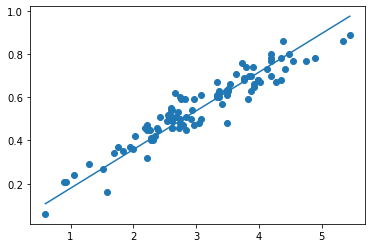

In [308]:
#Wykres przedstawiający modelowaną funkcję na tle danych punktów
graph2DMix(data1['X'], data1['Y'], predY_fax_d1)

Hypothesis: X is sampled from a normal distribution
Significance level: 0.05
p-value: 0.0459175
Hypothesis rejected. X doesn't seem to be sampled from a normal distribution.



[0.0030889877996462395, 0.1445985790725528, 0.8827351122800476]

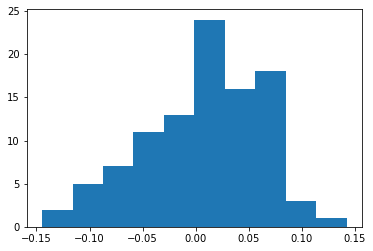

In [309]:
#test hipotezy statystycznej, że błędy mają rozkład normalny test chi-kwadrat Pearsona
#1 - średni błąd kwadratowy dotyczący wartości funkcji w danych punktach
#2 - największą wartość odchylenia wartości funkcji od danych punktów
#3 - wartość współczynnika R**2
# 88,3% > 85% - sukces w dopasowaniu
#histogram odchyleń wartości funkcji od danych
getDetails(data1['Y'], predY_fax_d1)

In [310]:
print("f(x) =  %s * x" % (a_fax_d1))

f(x) =  0.17896807423282313 * x


# f(X) = a * X; data2

In [311]:
# Używam obliczonego wcześniej wzoru na współczynnik a
a_fax_d2 = yax(data2['X'], data2['Y'])
a_fax_d2

1.0550468408004452

In [312]:
predY_fax_d2 = a_fax_d2*data2['X']

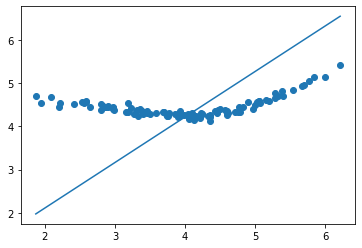

In [313]:
#Wykres przedstawiający modelowaną funkcję na tle danych punktów
graph2DMix(data2['X'], data2['Y'], predY_fax_d2)

Hypothesis: X is sampled from a normal distribution
Significance level: 0.05
p-value: 0.0038674
Hypothesis rejected. X doesn't seem to be sampled from a normal distribution.



[1.043524008316786, 1.1697305763946666, -17.859854134254967]

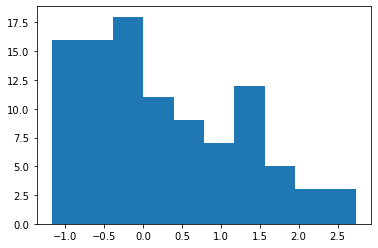

In [314]:
#test hipotezy statystycznej, że błędy mają rozkład normalny test chi-kwadrat Pearsona
#1 - średni błąd kwadratowy dotyczący wartości funkcji w danych punktach
#2 - największą wartość odchylenia wartości funkcji od danych punktów
#3 - wartość współczynnika R**2
# Porażka w dopasowaniu
#histogram odchyleń wartości funkcji od danych
getDetails(data2['Y'], predY_fax_d2)

In [315]:
print("f(x) =  %s * x" % (a_fax_d2))

f(x) =  1.0550468408004452 * x


# f(X) = a * X + b; data1

In [316]:
# Używam obliczonego wcześniej wzoru na współczynnik a i wyraz wolny b
ab_faxb_d1 = yaxb(data1['X'], data1['Y'])
ab_faxb_d1

[0.15731913673058445, 0.07310890980547102]

In [317]:
predY_faxb_d1 = ab_faxb_d1[0]*data1['X']+ab_faxb_d1[1]

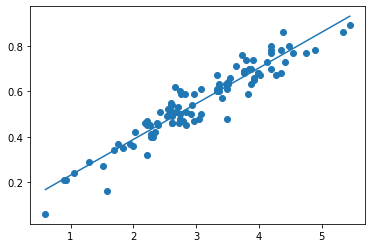

In [318]:
#Wykres przedstawiający modelowaną funkcję na tle danych punktów
graph2DMix(data1['X'], data1['Y'], predY_faxb_d1)

Hypothesis: X is sampled from a normal distribution
Significance level: 0.05
p-value: 0.5009497
Failed to reject the hypothesis.



[0.0026022655146449476, 0.16167314583979445, 0.8997740904850967]

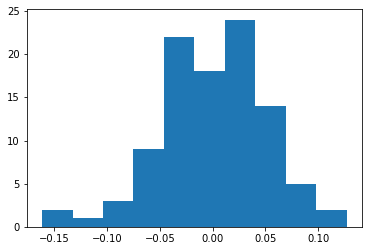

In [319]:
#test hipotezy statystycznej, że błędy mają rozkład normalny test chi-kwadrat Pearsona
#1 - średni błąd kwadratowy dotyczący wartości funkcji w danych punktach
#2 - największą wartość odchylenia wartości funkcji od danych punktów
#3 - wartość współczynnika R**2
# Porażka w dopasowaniu
#histogram odchyleń wartości funkcji od danych
getDetails(data1['Y'], predY_faxb_d1)

In [320]:
print("f(x) =  %s * x + %s" % (ab_faxb_d1[0],ab_faxb_d1[1]))

f(x) =  0.15731913673058445 * x + 0.07310890980547102


# f(X) = a * X + b; data2

In [321]:
# Używam obliczonego wcześniej wzoru na współczynnik a i wyraz wolny b
ab_faxb_d2 = yaxb(data2['X'], data2['Y'])
ab_faxb_d2

[0.08837797436001703, 4.094017041516359]

In [322]:
predY_faxb_d2 = ab_faxb_d2[0]*data2['X']+ab_faxb_d2[1]

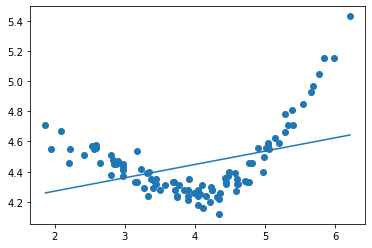

In [323]:
#Wykres przedstawiający modelowaną funkcję na tle danych punktów
graph2DMix(data2['X'], data2['Y'], predY_faxb_d2)

Hypothesis: X is sampled from a normal distribution
Significance level: 0.05
p-value: 0.0010321
Hypothesis rejected. X doesn't seem to be sampled from a normal distribution.



[0.04431795547219451, 0.35846122998243324, 0.1505413732999592]

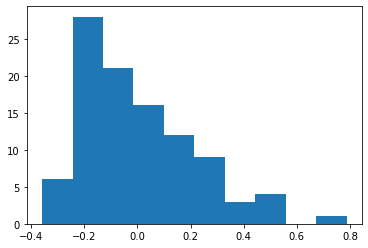

In [324]:
#test hipotezy statystycznej, że błędy mają rozkład normalny test chi-kwadrat Pearsona
#1 - średni błąd kwadratowy dotyczący wartości funkcji w danych punktach
#2 - największą wartość odchylenia wartości funkcji od danych punktów
#3 - wartość współczynnika R**2
# Porażka w dopasowaniu
#histogram odchyleń wartości funkcji od danych
getDetails(data2['Y'], predY_faxb_d2)

In [325]:
print("f(x) =  %s * x + %s" % (ab_faxb_d2[0],ab_faxb_d2[1]))

f(x) =  0.08837797436001703 * x + 4.094017041516359


# f(X) = a * X**2 + b * sin(X) + c; data1

#### Tutaj tworzę dwie kolumny:
#### X1 = X**2
#### X2 = sin(X)
#### Podstawiam do funkcji:
#### f(X1, X2) = a * X1 + b * X2 + c

In [326]:
#Tworzę kolumny
X1_x2_d1 = data1['X']**2
X2_sinx_d1 = np.sin(data1['X'])

In [327]:
#Obliczam współczynniki a, b i wyraz wolny c
abc_fax2bsinxc_d1 = linRegSolve([X1_x2_d1, X2_sinx_d1], data1['Y'])
abc_fax2bsinxc_d1

array([ 0.01866629, -0.05467283,  0.36462104])

In [328]:
predY_fax2bsinxc_d1 = abc_fax2bsinxc_d1[0]*X1_x2_d1+abc_fax2bsinxc_d1[1]*X2_sinx_d1+abc_fax2bsinxc_d1[2]

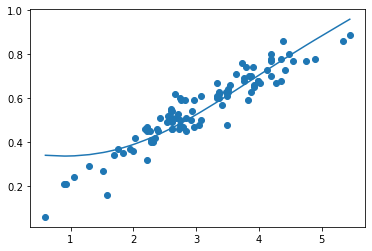

In [329]:
#Wykres przedstawiający modelowaną funkcję na tle danych punktów
graph2DMix(data1['X'], data1['Y'], predY_fax2bsinxc_d1)

Hypothesis: X is sampled from a normal distribution
Significance level: 0.05
p-value: 0.0162181
Hypothesis rejected. X doesn't seem to be sampled from a normal distribution.



[0.00437849757339118, 0.2804702999379863, 0.8313627494457255]

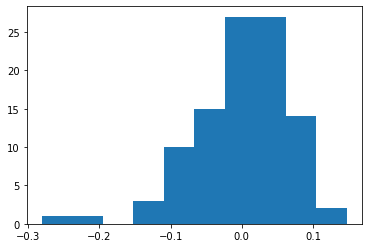

In [330]:
#test hipotezy statystycznej, że błędy mają rozkład normalny test chi-kwadrat Pearsona
#1 - średni błąd kwadratowy dotyczący wartości funkcji w danych punktach
#2 - największą wartość odchylenia wartości funkcji od danych punktów
#3 - wartość współczynnika R**2
# Porażka w dopasowaniu
#histogram odchyleń wartości funkcji od danych
getDetails(data1['Y'], predY_fax2bsinxc_d1)

In [331]:
print("f(x) = %s * X**2 + %s * sin(X) + %s" % (abc_fax2bsinxc_d1[0],abc_fax2bsinxc_d1[1], abc_fax2bsinxc_d1[2]))

f(x) = 0.018666291388895865 * X**2 + -0.05467282974021869 * sin(X) + 0.3646210368500065


# f(X) = a * X**2 + b * sin(X) + c; data2

#### Tutaj tworzę dwie kolumny:
#### X1 = X**2
#### X2 = sin(X)
#### Podstawiam do funkcji:
#### f(X1, X2) = a * X1 + b * X2 + c

In [332]:
#Tworzę kolumny
X1_x2_d2 = data2['X']**2
X2_sinx_d2 = np.sin(data2['X'])

In [333]:
#Obliczam współczynniki a, b i wyraz wolny c
abc_fax2bsinxc_d2 = linRegSolve([X1_x2_d2, X2_sinx_d2], data2['Y'])
abc_fax2bsinxc_d2

array([0.03815352, 0.47991814, 4.01137009])

In [334]:
predY_fax2bsinxc_d2 = abc_fax2bsinxc_d2[0]*X1_x2_d2+abc_fax2bsinxc_d2[1]*X2_sinx_d2+abc_fax2bsinxc_d2[2]

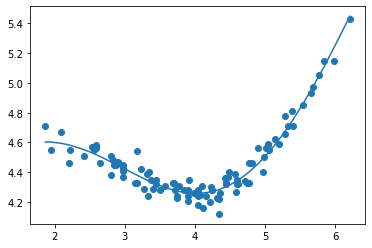

In [335]:
#Wykres przedstawiający modelowaną funkcję na tle danych punktów
graph2DMix(data2['X'], data2['Y'], predY_fax2bsinxc_d2)

Hypothesis: X is sampled from a normal distribution
Significance level: 0.05
p-value: 0.2442608
Failed to reject the hypothesis.



[0.0030385169504358912, 0.16458135974324417, 0.9417596229694876]

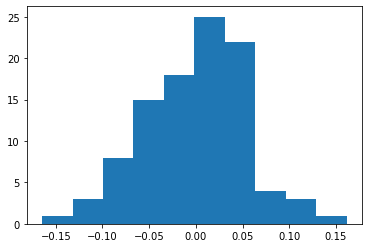

In [336]:
#test hipotezy statystycznej, że błędy mają rozkład normalny test chi-kwadrat Pearsona
#1 - średni błąd kwadratowy dotyczący wartości funkcji w danych punktach
#2 - największą wartość odchylenia wartości funkcji od danych punktów
#3 - wartość współczynnika R**2
# Porażka w dopasowaniu
#histogram odchyleń wartości funkcji od danych
getDetails(data2['Y'], predY_fax2bsinxc_d2)

In [337]:
print("f(x) = %s * X**2 + %s * sin(X) + %s" % (abc_fax2bsinxc_d2[0],abc_fax2bsinxc_d2[1], abc_fax2bsinxc_d2[2]))

f(x) = 0.03815351885214825 * X**2 + 0.4799181398853753 * sin(X) + 4.0113700929803455


# f(X1, X2) = a * X1 + b * X2 + c; data3

In [338]:
#Obliczam współczynniki a, b i wyraz wolny c
abc_fax1bx2c_d3 = linRegSolve([data3['X1'], data3['X2']], data3['Y'])
abc_fax1bx2c_d3

array([ 1.95718843, -0.4705921 ,  0.03002528])

In [339]:
predY_fax1bx2c_d3 = abc_fax1bx2c_d3[0]*data3['X1']+abc_fax1bx2c_d3[1]*data3['X2']+abc_fax1bx2c_d3[2]

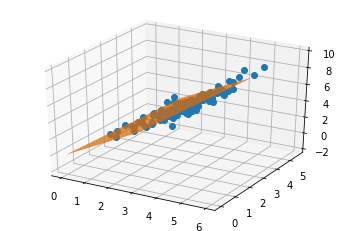

In [407]:
#Wykres przedstawiający modelowaną funkcję na tle danych punktów
plot1=plt.axes(projection='3d')
plot1.plot3D(data3['X1'], data3['X2'], data3['Y'], 'o')
X0t1=np.arange(0,5,0.25)
X1t1=np.arange(0,5,0.25)
X01,X11=np.meshgrid(X0t1,X1t1)
Yt1=abc_fax1bx2c_d3[0]*X01+abc_fax1bx2c_d3[1]*X11+abc_fax1bx2c_d3[2]
plot1.plot_surface(X01, X11, Yt1)

Hypothesis: X is sampled from a normal distribution
Significance level: 0.05
p-value: 0.3027164
Failed to reject the hypothesis.



[0.23705954337678262, 1.3161075686191257, 0.9368753384171703]

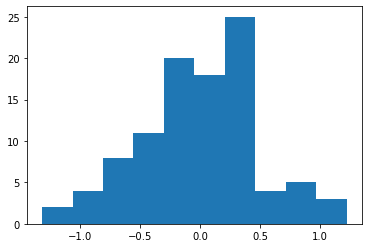

In [341]:
#test hipotezy statystycznej, że błędy mają rozkład normalny test chi-kwadrat Pearsona
#1 - średni błąd kwadratowy dotyczący wartości funkcji w danych punktach
#2 - największą wartość odchylenia wartości funkcji od danych punktów
#3 - wartość współczynnika R**2
# Porażka w dopasowaniu
#histogram odchyleń wartości funkcji od danych
getDetails(data3['Y'], predY_fax1bx2c_d3)

In [342]:
print("f(x) = %s * X1 + %s * X2 + %s" % (abc_fax1bx2c_d3[0],abc_fax1bx2c_d3[1], abc_fax1bx2c_d3[2]))

f(x) = 1.957188427395762 * X1 + -0.4705921015924022 * X2 + 0.030025284050223876


# f(X1, X2) = a * X1 + b * X2 + c; data4

In [346]:
#Obliczam współczynniki a, b i wyraz wolny c
abc_fax1bx2c_d4 = linRegSolve([data4['X1'], data4['X2']], data4['Y'])
abc_fax1bx2c_d4

array([ 0.55664361, -2.79668991, 10.45655158])

In [347]:
predY_fax1bx2c_d4 = abc_fax1bx2c_d4[0]*data4['X1']+abc_fax1bx2c_d4[1]*data4['X2']+abc_fax1bx2c_d4[2]

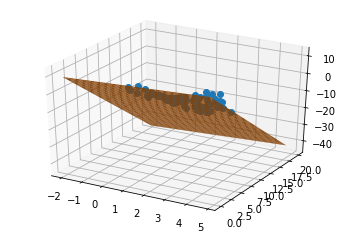

In [365]:
#Wykres przedstawiający modelowaną funkcję na tle danych punktów
plot2=plt.axes(projection='3d')
plot2.plot3D(data4['X1'], data4['X2'], data4['Y'], 'o')
X0t2=np.arange(-2,5,0.25)
X1t2=np.arange(0,20,0.25)
X02,X12=np.meshgrid(X0t2,X1t2)
Yt2=abc_fax1bx2c_d4[0]*X02+abc_fax1bx2c_d4[1]*X12+abc_fax1bx2c_d4[2]
plot2.plot_surface(X02, X12, Yt2)

Hypothesis: X is sampled from a normal distribution
Significance level: 0.05
p-value: 0.0086767
Hypothesis rejected. X doesn't seem to be sampled from a normal distribution.



[2.7735881098780375, 3.203253267113503, 0.8010570202376635]

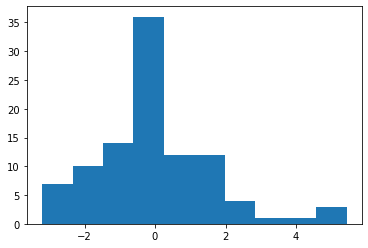

In [366]:
#test hipotezy statystycznej, że błędy mają rozkład normalny test chi-kwadrat Pearsona
#1 - średni błąd kwadratowy dotyczący wartości funkcji w danych punktach
#2 - największą wartość odchylenia wartości funkcji od danych punktów
#3 - wartość współczynnika R**2
# Porażka w dopasowaniu
#histogram odchyleń wartości funkcji od danych
getDetails(data4['Y'], predY_fax1bx2c_d4)

In [367]:
print("f(x) = %s * X1 + %s * X2 + %s" % (abc_fax1bx2c_d4[0],abc_fax1bx2c_d4[1], abc_fax1bx2c_d4[2]))

f(x) = 0.556643612186602 * X1 + -2.79668990805584 * X2 + 10.45655157792129


# f(X1, X2) = a * X1^2 + b * X1*X2 + c * X2^2 + d * X1 + e * X2 + f; data3

#### Tutaj tworzę trzy kolumny:
#### X3 = X1**2
#### X4 = X1*X2
#### X5 = X2**2
#### Podstawiam do funkcji:
#### f(X3, X4, X5, X1, X2) = a * X3 + b * X4 + c * X5 + d * X1 + e * X2 + f

In [368]:
X3_f_d3 = data3['X1']**2
X4_f_d3 = data3['X1']*data3['X2']
X5_f_d3 = data3['X2']**2

In [369]:
#Obliczam współczynniki a, b i wyraz wolny c
abcdef_f_d3 = linRegSolve([X3_f_d3, X4_f_d3, X5_f_d3, data3['X1'], data3['X2']], data3['Y'])
abcdef_f_d3

array([ 0.01974733,  0.07635587,  0.00577579,  1.59283746, -0.71627989,
        0.90465939])

In [370]:
predY_f_d3 = abcdef_f_d3[0]*X3_f_d3+abcdef_f_d3[1]*X4_f_d3+abcdef_f_d3[2]*X5_f_d3+abcdef_f_d3[3]*data3['X1']+abcdef_f_d3[4]*data3['X2']+abcdef_f_d3[5]

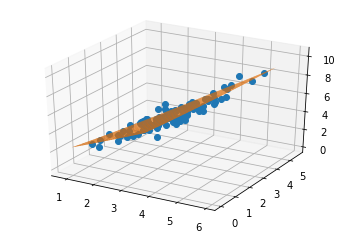

In [391]:
#Wykres przedstawiający modelowaną funkcję na tle danych punktów
plot3=plt.axes(projection='3d')
plot3.plot3D(data3['X1'], data3['X2'], data3['Y'], 'o')
X0t3=np.arange(1,6,0.25)
X1t3=np.arange(0,5,0.25)
X03,X13=np.meshgrid(X0t3,X1t3)
Yt3=abcdef_f_d3[0]*X03*X03+abcdef_f_d3[1]*X03*X13+abcdef_f_d3[2]*X13*X13+abcdef_f_d3[3]*X03+abcdef_f_d3[4]*X13+abcdef_f_d3[5]
plot3.plot_surface(X03, X13, Yt3)

Hypothesis: X is sampled from a normal distribution
Significance level: 0.05
p-value: 0.2935389
Failed to reject the hypothesis.



[0.22936381845980694, 1.2242279560770197, 0.9389245705387667]

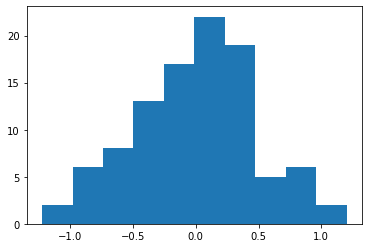

In [392]:
#test hipotezy statystycznej, że błędy mają rozkład normalny test chi-kwadrat Pearsona
#1 - średni błąd kwadratowy dotyczący wartości funkcji w danych punktach
#2 - największą wartość odchylenia wartości funkcji od danych punktów
#3 - wartość współczynnika R**2
# Porażka w dopasowaniu
#histogram odchyleń wartości funkcji od danych
getDetails(data3['Y'], predY_f_d3)

In [393]:
print("f(x) = %s * X1^2 + %s * X1*X2 + %s * X2^2 + %s * X1 + %s * X2 + %s" % (abcdef_f_d3[0], abcdef_f_d3[1], abcdef_f_d3[2], abcdef_f_d3[3], abcdef_f_d3[4], abcdef_f_d3[5]))

f(x) = 0.019747330459817223 * X1^2 + 0.07635587234882413 * X1*X2 + 0.005775786373781343 * X2^2 + 1.5928374571903876 * X1 + -0.7162798873499147 * X2 + 0.9046593875161194


# f(X1, X2) = a * X1^2 + b * X1*X2 + c * X2^2 + d * X1 + e * X2 + f; data4

#### Tutaj tworzę trzy kolumny:
#### X3 = X1**2
#### X4 = X1*X2
#### X5 = X2**2
#### Podstawiam do funkcji:
#### f(X3, X4, X5, X1, X2) = a * X3 + b * X4 + c * X5 + d * X1 + e * X2 + f

In [394]:
X3_f_d4 = data4['X1']**2
X4_f_d4 = data4['X1']*data4['X2']
X5_f_d4 = data4['X2']**2

In [395]:
#Obliczam współczynniki a, b i wyraz wolny c
abcdef_f_d4 = linRegSolve([X3_f_d4, X4_f_d4, X5_f_d4, data4['X1'], data4['X2']], data4['Y'])
abcdef_f_d4

array([ 1.00094343, -0.99485917, -0.51284114, -2.01627118,  3.05689129,
        4.96621689])

In [396]:
predY_f_d4 = abcdef_f_d4[0]*X3_f_d4+abcdef_f_d4[1]*X4_f_d4+abcdef_f_d4[2]*X5_f_d4+abcdef_f_d4[3]*data4['X1']+abcdef_f_d4[4]*data4['X2']+abcdef_f_d4[5]

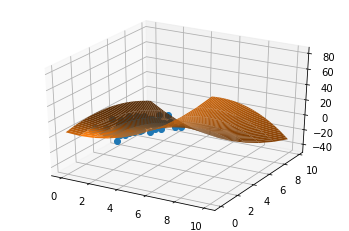

In [400]:
#Wykres przedstawiający modelowaną funkcję na tle danych punktów
plot4=plt.axes(projection='3d')
plot4.plot3D(data3['X1'], data3['X2'], data3['Y'], 'o')
X0t4=np.arange(0,10.25)
X1t4=np.arange(0,10,0.25)
X04,X14=np.meshgrid(X0t4,X1t4)
Yt4=abcdef_f_d4[0]*X04*X04+abcdef_f_d4[1]*X04*X14+abcdef_f_d4[2]*X14*X14+abcdef_f_d4[3]*X04+abcdef_f_d4[4]*X14+abcdef_f_d4[5]
plot4.plot_surface(X04, X14, Yt4)

Hypothesis: X is sampled from a normal distribution
Significance level: 0.05
p-value: 0.0396639
Hypothesis rejected. X doesn't seem to be sampled from a normal distribution.



[0.006057403145268748, 0.21805115970294686, 0.9995655166579891]

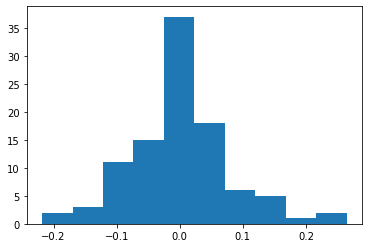

In [401]:
#test hipotezy statystycznej, że błędy mają rozkład normalny test chi-kwadrat Pearsona
#1 - średni błąd kwadratowy dotyczący wartości funkcji w danych punktach
#2 - największą wartość odchylenia wartości funkcji od danych punktów
#3 - wartość współczynnika R**2
# Porażka w dopasowaniu
#histogram odchyleń wartości funkcji od danych
getDetails(data4['Y'], predY_f_d4)

In [402]:
print("f(x) = %s * X1^2 + %s * X1*X2 + %s * X2^2 + %s * X1 + %s * X2 + %s" % (abcdef_f_d4[0], abcdef_f_d4[1], abcdef_f_d4[2], abcdef_f_d4[3], abcdef_f_d4[4], abcdef_f_d4[5]))

f(x) = 1.0009434346443409 * X1^2 + -0.994859170187305 * X1*X2 + -0.512841141039745 * X2^2 + -2.016271175898764 * X1 + 3.0568912928101706 * X2 + 4.966216893435204
